In [ ]:
import dlt
from dlt.sources.helpers import requests

@dlt.resource(table_name="photos", write_disposition="replace")
def get_photos():
    url = "https://jsonplaceholder.typicode.com/photos"
    response = requests.get(url)
    response.raise_for_status()
    yield response.json()

pipeline = dlt.pipeline(
    pipeline_name='photos_pipeline',
    destination='duckdb',  # replace with your desired destination
    dataset_name='photos_data',
)

load_info = pipeline.run(get_photos)
print(load_info)

Pipeline photos_pipeline load step completed in 0.44 seconds
1 load package(s) were loaded to destination duckdb and into dataset photos_data
The duckdb destination used duckdb:////Users/muradarfanyan/Developer/postgres_docker/juputer_notebook/photos_pipeline.duckdb location to store data
Load package 1707549865.893595 is LOADED and contains no failed jobs


In [ ]:
import duckdb
# show the outcome

conn = duckdb.connect(f"{pipeline.pipeline_name}.duckdb")

# let's see the tables
conn.sql(f"SET search_path = '{pipeline.dataset_name}'")
print('Loaded tables: ')
display(conn.sql("show tables"))


print("\n\n\n Rides table below: Note the times are properly typed")
persons = conn.sql("SELECT * FROM photos").df()
display(persons)

Loaded tables: 


┌─────────────────────┐
│        name         │
│       varchar       │
├─────────────────────┤
│ _dlt_loads          │
│ _dlt_pipeline_state │
│ _dlt_version        │
│ photos              │
└─────────────────────┘




 Rides table below: Note the times are properly typed


,album_id,id,title,url,thumbnail_url,_dlt_load_id,_dlt_id
0,1,1,accusamus beatae ad facilis cum similique qui ...,https://via.placeholder.com/600/92c952,https://via.placeholder.com/150/92c952,1707549865.893595,zFHbQPY/pYMzHQ
1,1,2,reprehenderit est deserunt velit ipsam,https://via.placeholder.com/600/771796,https://via.placeholder.com/150/771796,1707549865.893595,EROcg352LvkgGA
2,1,3,officia porro iure quia iusto qui ipsa ut modi,https://via.placeholder.com/600/24f355,https://via.placeholder.com/150/24f355,1707549865.893595,GcBG4If6S2nelg
3,1,4,culpa odio esse rerum omnis laboriosam volupta...,https://via.placeholder.com/600/d32776,https://via.placeholder.com/150/d32776,1707549865.893595,EKAc1uc5BrX5vQ
4,1,5,natus nisi omnis corporis facere molestiae rer...,https://via.placeholder.com/600/f66b97,https://via.placeholder.com/150/f66b97,1707549865.893595,PLzfhtb/1oKNvA
...,...,...,...,...,...,...,...
4995,100,4996,voluptatem ab aliquam dolorum vel voluptas qui...,https://via.placeholder.com/600/b3db9a,https://via.placeholder.com/150/b3db9a,1707549865.893595,yhx3wCdZQ8v3/g
4996,100,4997,sunt amet autem exercitationem fuga consequatur,https://via.placeholder.com/600/13454b,https://via.placeholder.com/150/13454b,1707549865.893595,CRoO6TT0ZEUx5A
4997,100,4998,qui quo cumque distinctio aut voluptas,https://via.placeholder.com/600/315aa6,https://via.placeholder.com/150/315aa6,1707549865.893595,JD8QabxbTSBJZg
4998,100,4999,in voluptate sit officia non nesciunt quis,https://via.placeholder.com/600/1b9d08,https://via.placeholder.com/150/1b9d08,1707549865.893595,fb1W9uUdbNbDAQ


```
❯ dlt pipeline photos_pipeline show
Found pipeline photos_pipeline in /Users/muradarfanyan/.dlt/pipelines

  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8502
  Network URL: http://192.168.0.100:8502

```


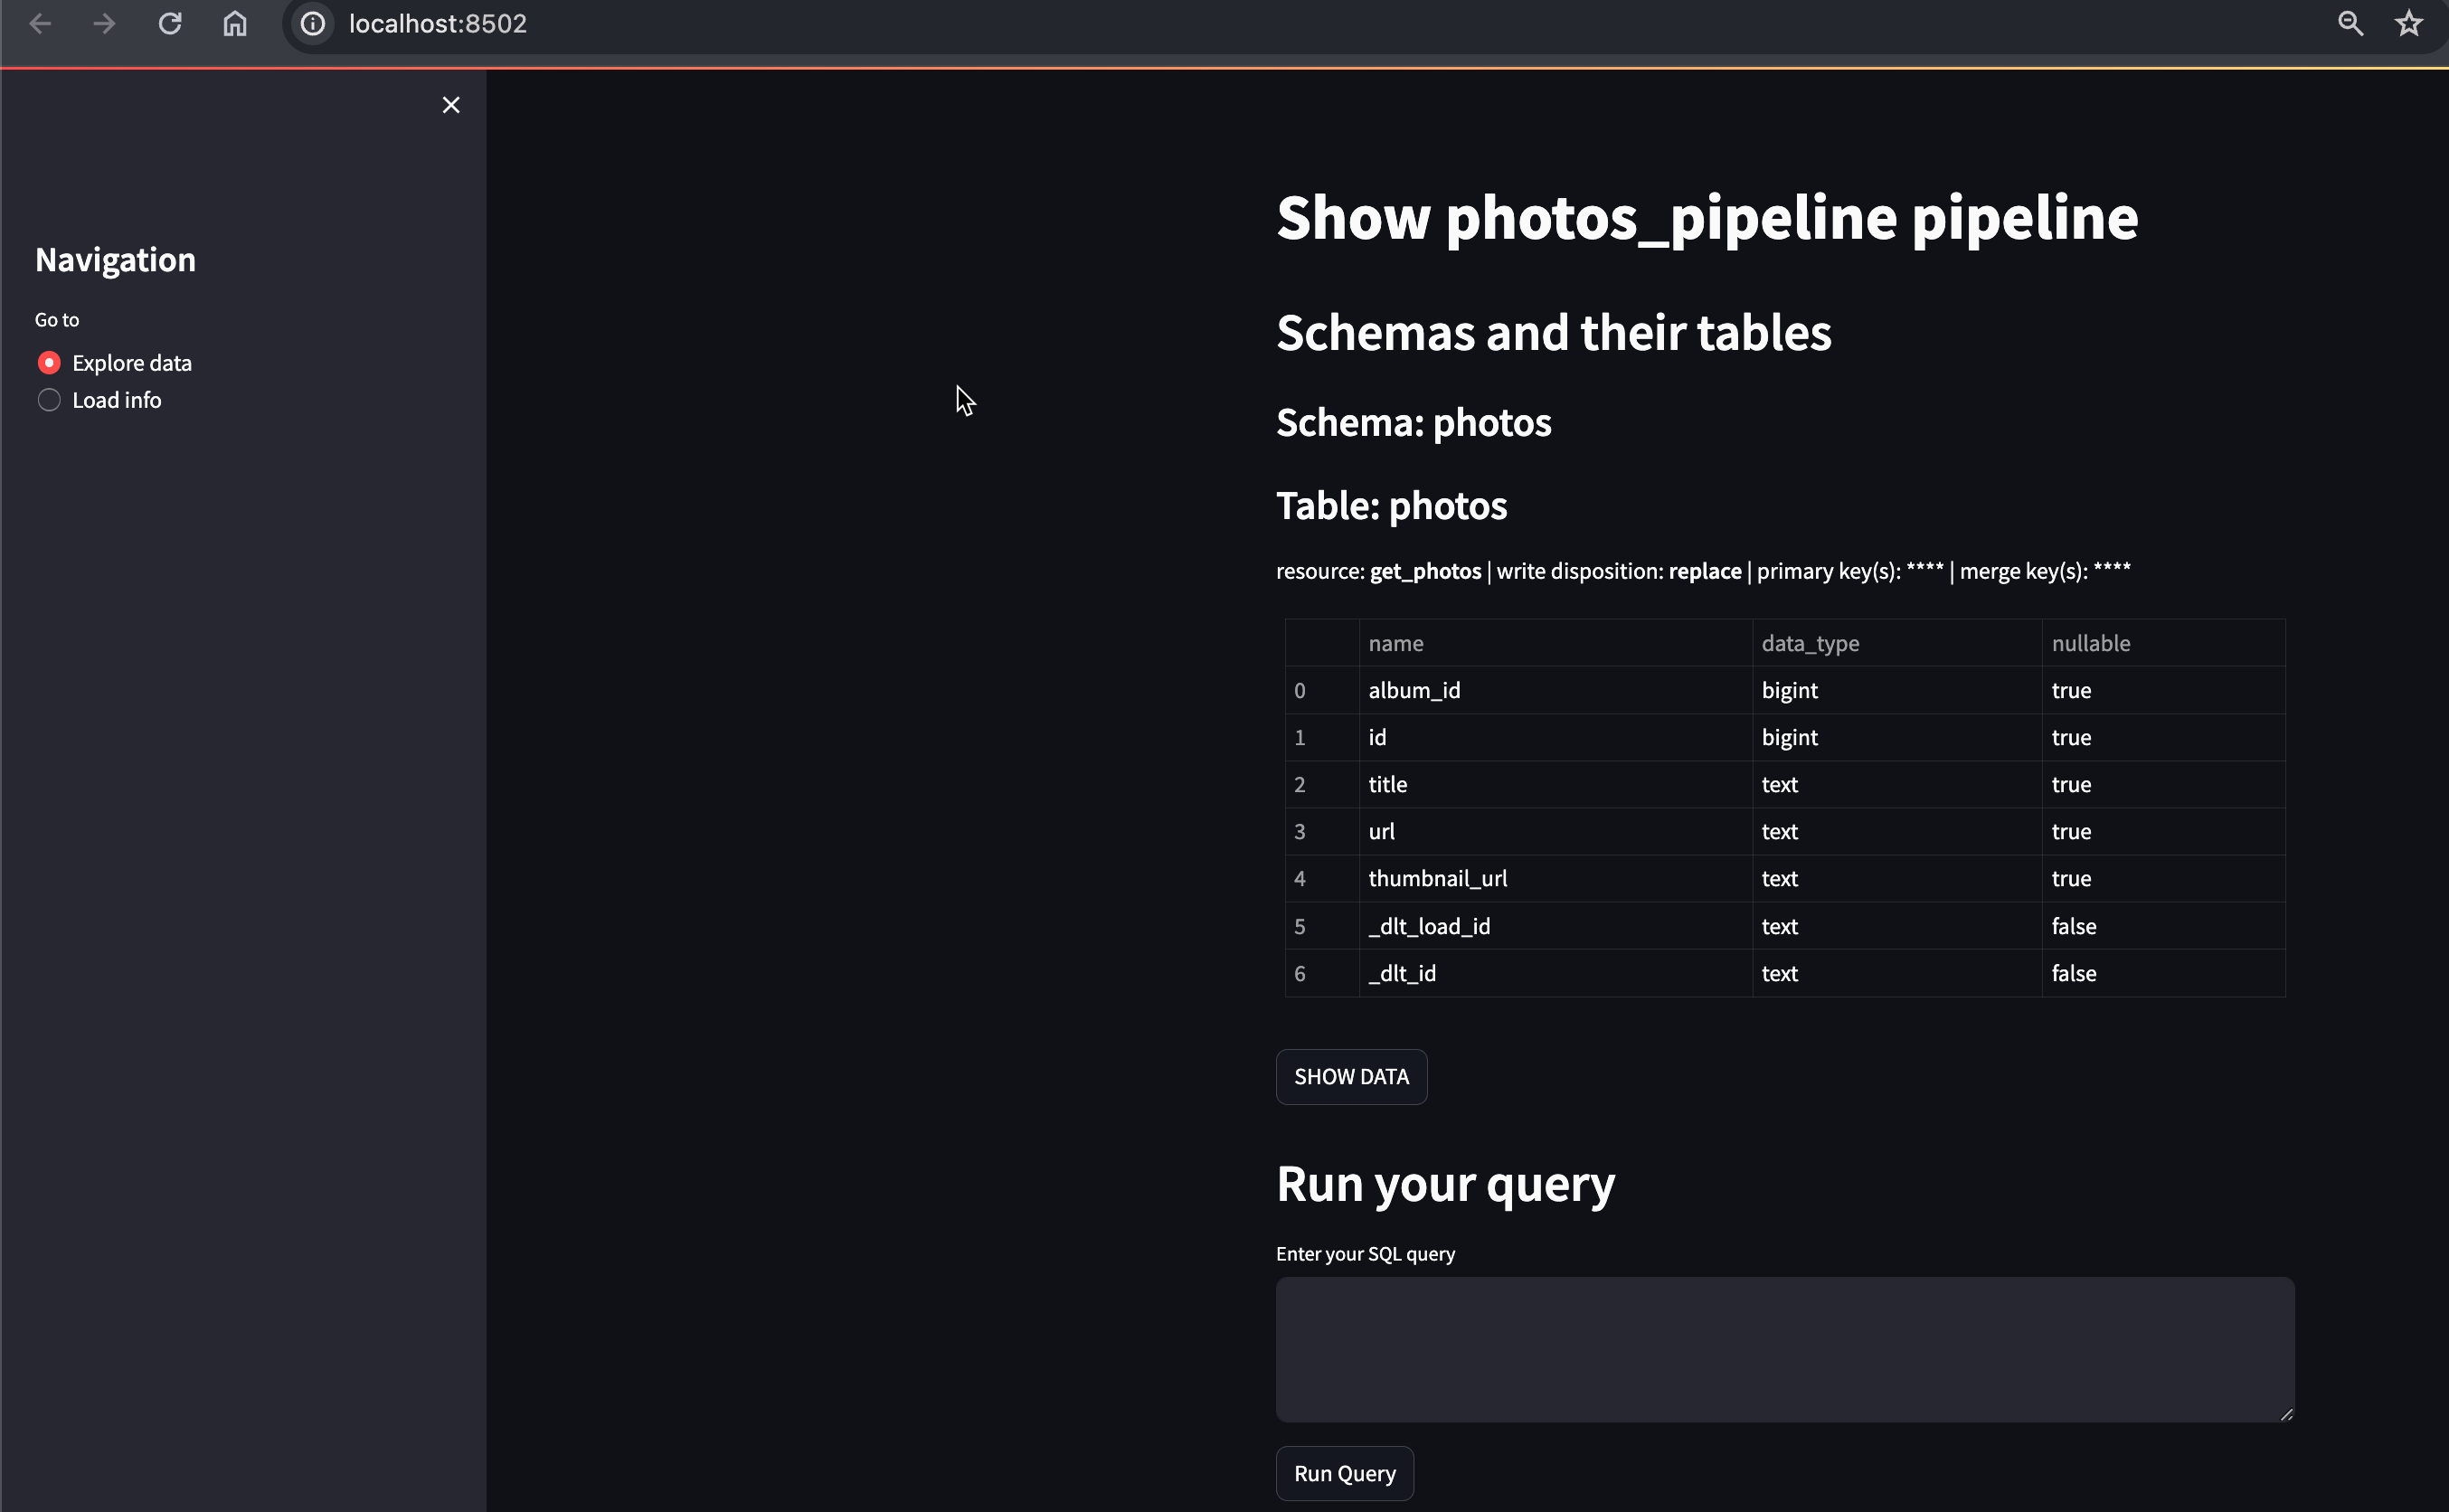